## Notebook 4 — Modelling & Prediction (Patient Waiting Time)

## Objectives  
- Build and evaluate a *regression model* to predict ER patient waiting time.  
- Use patient and visit characteristics as input features.  
- Assess how well the model can approximate real waiting times and discuss limitations.

## Inputs  
- Cleaned dataset from Notebook 2: ./data/cleaned_emergency_room.csv  
- Selected features (e.g., age, gender, referral department, admission outcome).

## Outputs  
- A trained regression model that predicts Patient Waittime.  
- Evaluation metrics:
  - Mean Absolute Error (MAE)  
  - Root Mean Squared Error (RMSE)  
  - R² (coefficient of determination)  
- Visualisations comparing actual vs. predicted waiting times.  
- Discussion of model performance and data limitations.





# Import all required libraries for the machine learning model
# pandas: for data loading and manipulation
# train_test_split: to split data into training and testing sets
# ColumnTransformer: to preprocess numerical and categorical features
# OneHotEncoder, StandardScaler: for encoding and scaling
# Pipeline: to build a clean end-to-end modelling pipeline
# RandomForestClassifier: the ML algorithm used for binary classification
# accuracy_score, classification_report, confusion_matrix: evaluation metrics
# matplotlib & seaborn: for visualising model results


In [28]:
# 1. Import the libraries we need
# -----------------------------------------------------------
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Load the cleaned dataset into a DataFrame
df = pd.read_csv("../data/cleaned_emergency_room.csv")
df.head()

,Patient Id,Patient Admission Date,Patient Gender,Patient Age,Patient Race,Department Referral,Patient Admission Flag,Patient Waittime,Patients CM
0,145-39-5406,2024-03-20 08:47:00,M,69,White,Unknown,False,39,0
1,316-34-3057,2024-06-15 11:29:00,M,4,Native American/Alaska Native,Unknown,True,27,0
2,897-46-3852,2024-06-20 09:13:00,F,56,African American,General Practice,True,55,0
3,358-31-9711,2024-02-04 22:34:00,F,24,Native American/Alaska Native,General Practice,True,31,0
4,289-26-0537,2024-09-04 17:48:00,M,5,African American,Orthopedics,False,10,0


In [17]:
from sklearn.ensemble import RandomForestRegressor

In [29]:
# -----------------------------------------------------------
# 3. Select features (X) and target (y)
#    Target: Patient Waittime  → regression problem
# -----------------------------------------------------------

feature_cols = [
    "Patient Age",
    "Patient Gender",
    "Department Referral",
    "Patient Admission Flag",  # True/False: admitted or discharged
]

target_col = "Patient Waittime"

# Features matrix
X = df[feature_cols].copy()

# Target vector (waiting time in minutes)
y = df[target_col].astype(float)  # make sure it's numeric

In [31]:

# 4. Split into train and test sets
# -----------------------------------------------------------

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,      # 20% test data
    random_state=42     # for reproducibility
)

In [32]:

# 5. Define preprocessing for numeric & categorical features
# -----------------------------------------------------------

numeric_features = ["Patient Age"]
categorical_features = ["Patient Gender", "Department Referral", "Patient Admission Flag"]

numeric_transformer = StandardScaler()

categorical_transformer = OneHotEncoder(handle_unknown="ignore")

# ColumnTransformer applies different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# -----------------------------------------------------------
# 6. Define the regression model and build the pipeline
# -----------------------------------------------------------

# RandomForestRegressor: tree-based model for regression
rf_regressor = RandomForestRegressor(
    n_estimators=200,   # number of trees
    random_state=42
)

# Pipeline: first preprocess, then train the model
rf_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", rf_regressor)
])

In [33]:
# -----------------------------------------------------------
# 7. Fit the pipeline on the training data
# -----------------------------------------------------------
rf_pipeline.fit(X_train, y_train)

# -----------------------------------------------------------
# 8.

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocess', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers cont

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 9. Make predictions on the test set
y_pred = rf_pipeline.predict(X_test)

# 10. Calculate evaluation metrics
# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Root Mean Squared Error = sqrt(MSE)
rmse = np.sqrt(mse)

# R-squared score
r2 = r2_score(y_test, y_pred)

# 11. Print the results nicely
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.3f}")

Mean Absolute Error (MAE): 13.47
Root Mean Squared Error (RMSE): 15.96
R² Score: -0.188


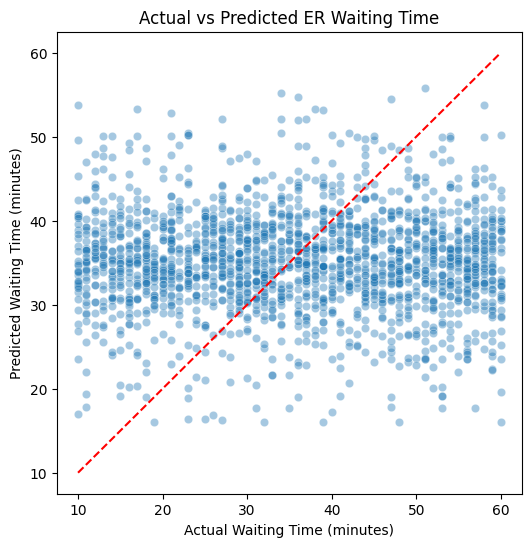

In [38]:
# Plot Actual vs Predicted waiting times

plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.4)

plt.xlabel("Actual Waiting Time (minutes)")
plt.ylabel("Predicted Waiting Time (minutes)")
plt.title("Actual vs Predicted ER Waiting Time")
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], "r--")

plt.show()